In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [2]:
# Define transformations for the training and test data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Normalize the data to mean=0.1307 and std=0.3081
])

# Download and load the training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create DataLoader for training and test datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|████████████████████████████████████████████████████████████████████| 9912422/9912422 [00:11<00:00, 851963.25it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 89074.62it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1012954.24it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 4536920.40it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layer 1: 1 input channel (grayscale), 32 output channels, 3x3 kernel size
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Convolutional layer 2: 32 input channels, 64 output channels, 3x3 kernel size
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Max-pooling layer: 2x2 window size
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layer 1: 64*7*7 input features, 128 output features
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # Fully connected layer 2: 128 input features, 10 output features (for 10 classes)
        self.fc2 = nn.Linear(128, 10)
        # Dropout layer to avoid overfitting
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # Apply ReLU activation, convolution, and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Apply ReLU activation, convolution, and pooling
        x = x.view(-1, 64 * 7 * 7)  # Flatten the feature maps
        x = F.relu(self.fc1(x))  # Apply ReLU activation to fully connected layer 1
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)  # Output layer (no activation needed, will apply in loss function)
        return x

# Initialize the model
model = CNN()

In [4]:
# Define loss function
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
import torch.nn.functional as F  # Import torch.nn.functional as F
num_epochs = 10

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()  # Zero the gradients

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/10], Loss: 0.1597
Epoch [2/10], Loss: 0.0527
Epoch [3/10], Loss: 0.0390
Epoch [4/10], Loss: 0.0306
Epoch [5/10], Loss: 0.0247
Epoch [6/10], Loss: 0.0192
Epoch [7/10], Loss: 0.0184
Epoch [8/10], Loss: 0.0147
Epoch [9/10], Loss: 0.0136
Epoch [10/10], Loss: 0.0134


In [6]:
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')

Accuracy of the model on the 10000 test images: 99.32%


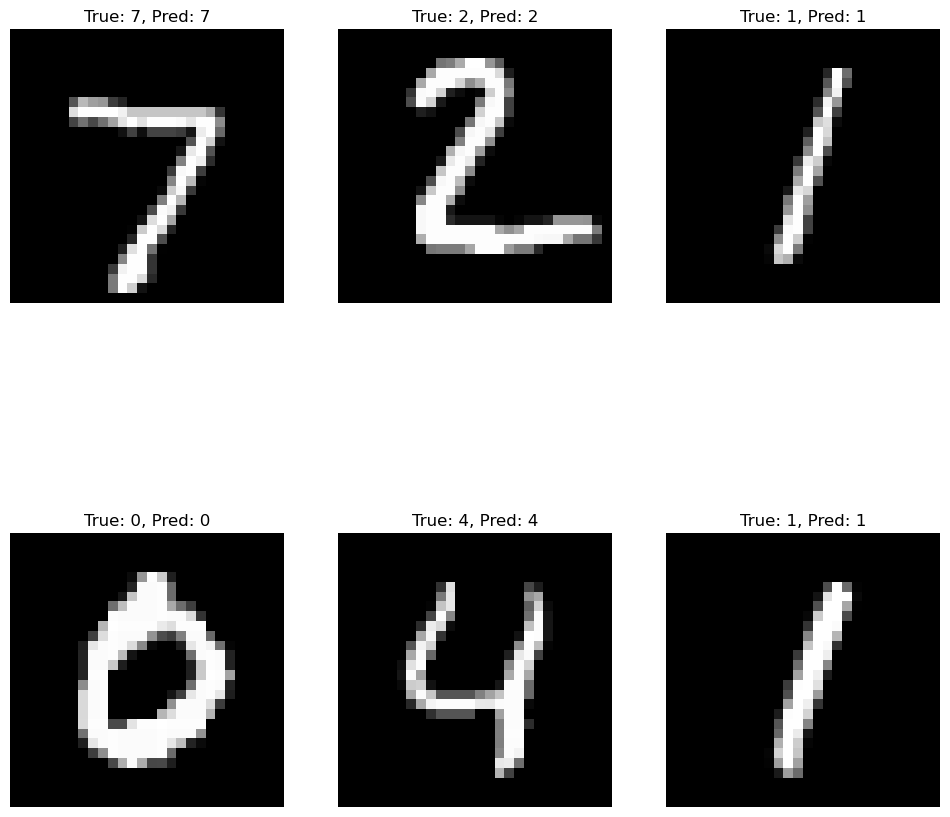

In [7]:
# Function to visualize predictions
def visualize_predictions(images, labels, predicted):
    plt.figure(figsize=(12, 12))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i].numpy().squeeze(), cmap='gray')
        plt.title(f'True: {labels[i]}, Pred: {predicted[i]}')
        plt.axis('off')
    plt.show()

# Get a batch of test data
images, labels = next(iter(test_loader))
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Visualize predictions
visualize_predictions(images, labels, predicted)